## Example of the Proper Orthogonal Decomposition (POD) of a 1D single wave 
Test Function : 
$$
f(x,t)=A_{1}\exp[-\frac{(x-x_{1})^{2}}{2\sigma_{1}^{2}}]\sin(2\pi f_{1}t)+A_{2}\exp[-\frac{(x-x_{2})^{2}}{2\sigma_{2}^{2}}]\sin(2\pi f_{2}t)
$$

In [1]:
using LinearAlgebra, Plots;gr();default(size=(300,200))

In [2]:
# Define the dataset Y
Nx = 401
x = range(-2,2,length=Nx) #  spatial coordinate (dx = 0.01)

Nt = 1001
t = range(0,10,length=Nt) # time coordinate (dt = 0.01)

A1 = 1.
x1 = 0.5
σ1 = 0.2

A2 = 2.
x2 = -1.
σ2 = 0.2

f1 = 1.
f2 = 4.

#gaussian processes
y1 = A1*exp.(-((x.-x1).^2)/(2*σ1^2))
y2 = A2*exp.(-((x.-x2).^2)/(2*σ2^2));

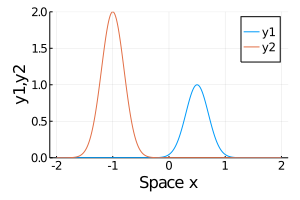

In [3]:
# plot of the two spatial bumps
plot(x,y1)
plot!(x,y2,xlabel="Space x",ylabel="y1,y2",ylim=(-0.001,2.))

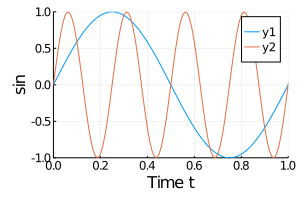

In [4]:
# plot of the two temporal dynamics
plot(t,sin.(2*π*f1*t))
plot!(t,sin.(2*π*f2*t),xlabel="Time t",ylabel="sin",xlim=(0,1),ylim=(-1,1))

In [5]:
#  Building the two dimensional continous function f(x,t)
f(x,t)=A1*exp.(-((x.-x1).^2)/(2*σ1^2))sin(2*π*f1*t)+ A2*exp.(-((x.-x2).^2)/(2*σ2^2))sin(2*π*f2*t)

f (generic function with 1 method)

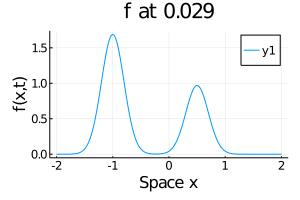

In [6]:
# Plot a continous signal at t=290*0.01
plot(x,f(x,29*0.01),title="f at 0.029",xlabel="Space x",ylabel="f(x,t)")

In [7]:
#  Building the discrete spatio-temporal series Y 
#Build of the spatio-temporal x vs t data matrix Y
Y = zeros(Nx,Nt)
j=1
for tt in t
    Y[:,j] = y1*sin(2*π*f1*tt) + y2*sin(2*π*f2*tt) # gaussian processes 
    j+=1                                           # with their temporal dynamics
end
println("\rThe Data Matrix Y = \r")
Y

The Data Matrix Y = 


401×1001 Array{Float64,2}:
 0.0  1.85356e-6   3.59066e-6   5.10214e-6   …  -1.85356e-6   -7.30213e-20
 0.0  2.37705e-6   4.60474e-6   6.54309e-6      -2.37705e-6   -9.36441e-20
 0.0  3.04077e-6   5.89047e-6   8.37005e-6      -3.04077e-6   -1.19791e-19
 0.0  3.88009e-6   7.51639e-6   1.06804e-5      -3.88009e-6   -1.52857e-19
 0.0  4.93873e-6   9.56715e-6   1.35944e-5      -4.93873e-6   -1.94562e-19
 0.0  6.27052e-6   1.2147e-5    1.72603e-5   …  -6.27052e-6   -2.47028e-19
 0.0  7.94156e-6   1.53841e-5   2.186e-5        -7.94156e-6   -3.12859e-19
 0.0  1.00328e-5   1.94352e-5   2.76164e-5      -1.00328e-5   -3.95243e-19
 0.0  1.26431e-5   2.44917e-5   3.48015e-5      -1.26431e-5   -4.98076e-19
 0.0  1.58927e-5   3.07868e-5   4.37464e-5      -1.58927e-5   -6.26095e-19
 0.0  1.99277e-5   3.86032e-5   5.48532e-5   …  -1.99277e-5   -7.85053e-19
 0.0  2.49247e-5   4.82833e-5   6.86081e-5      -2.49247e-5   -9.81912e-19
 0.0  3.10969e-5   6.02399e-5   8.55978e-5      -3.10969e-5   -1.22507e-1

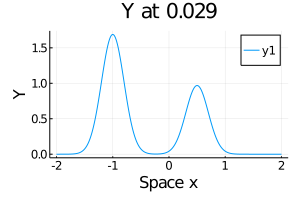

In [8]:
# Plot a discrete signal at t=(30-1)*0.01
plot(x,Y[:,30],title="Y at 0.029",xlabel="Space x",ylabel="Y")

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\anim_1_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\6RLiv\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\anim_1_fps15.gif")
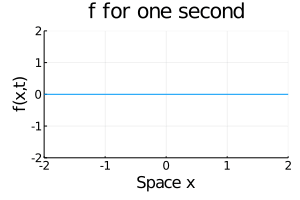

In [9]:
# 1D Animation over the first second
anim=Animation()
anim = @animate for tt in range(0,1,length=100)
    plot( x, f(x,tt),xlim=(-2,2),title="f for one second",leg=false,ylim=(-2.,2.),xlabel="Space x",ylabel="f(x,t)")
    Plots.frame(anim)
end
gif(anim, "img/anim_1_fps15.gif", fps = 15)

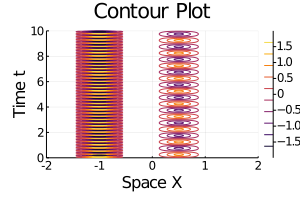

In [10]:
# 2D Contour Plot of the data matrix Y
contour(x,t,f,levels=10)
xlabel!("Space X")
ylabel!("Time t")
title!("Contour Plot")

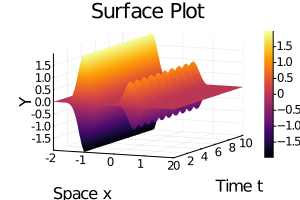

In [11]:
# 3D Surface Plot of the dataset
#my_cg = cgrad([:blue, :yellow])
surface(collect(x),collect(t),f, xaxis="Space x", yaxis="Time t",zaxis="Y", title="Surface Plot")

In [12]:
# another way to create the data matrix Y (like the matlab meshgrid function )
X = repeat(reshape(x, :, 1), 1,length(t))
T = repeat(reshape(t,1,:),  length(x),1)
YY = map(f, X, T);

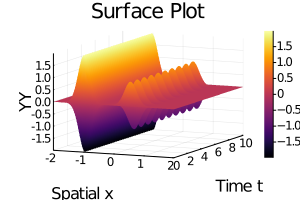

In [13]:
surface(X[:,1],T[1,:],YY', xaxis="Spatial x", yaxis="Time t",zaxis="YY", title="Surface Plot")

In [ ]:
#Interactive Plot 
using PlotlyJS;
trace=PlotlyJS.surface(x=x,y=t,z=Y, xlabel="Space X",colorscale="Viridis")
layout=PlotlyJS.Layout(title="Interactive Plot")
PlotlyJS.plot(trace,layout)

In [14]:
# Data decomposition with the singular value decomposition 
# U matrix (spatail Correlations); Σ matrix (weighting of projections), Vt (time dynamics) 
Z=svd(Y)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
401×401 Array{Float64,2}:
 -6.25917e-7   -6.51912e-13  -2.88083e-6   …   7.70037e-6    3.66415e-6
 -8.02689e-7   -8.35887e-13   0.696543         0.055008      0.0269558
 -1.02682e-6   -1.06946e-12  -0.0462142       -0.124053      0.12134
 -1.31024e-6   -1.36466e-12  -3.45842e-6       0.0527877    -0.0472681
 -1.66773e-6   -1.73699e-12  -2.59167e-6      -0.0892514    -0.172407
 -2.11745e-6   -2.20539e-12  -5.89559e-6   …  -0.0572808    -0.0230898
 -2.68173e-6   -2.79311e-12  -1.24218e-5      -0.106242     -0.0576367
 -3.38791e-6   -3.52861e-12  -2.9013e-6       -0.0563104     0.035631
 -4.26935e-6   -4.44667e-12  -1.42246e-5       0.173117     -0.361424
 -5.36669e-6   -5.58958e-12  -3.46502e-6       0.0577139    -0.0796303
 -6.72924e-6   -7.00872e-12  -1.72212e-5   …   0.150512      1.95958e-5
 -8.41665e-6   -8.76621e-12  -3.2856e-5       -0.0998876     2.9103e-5
 -1.05009e-5   -1.0937e-11   -5.32864e-5       0.119027      3.83159e-5
  ⋮  

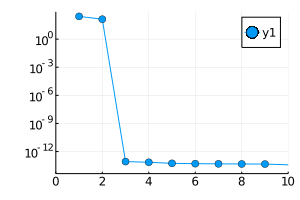

In [15]:
#= plot of the singular values (see the  two most dominants features due to the two ranks dataset 
(the two bumps with their temporal dynamics) The very good decay shows the existence of a low rank subspace=#
plot(Z.S, yaxis=:log, xlim=(0,10),shape =:circle)

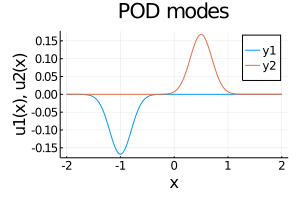

In [16]:
# Plot of the POD modes (Uj ; j={1,2}). Due to the very diffents spatial scales, the POD modes extracted physical, 
plot(x,Z.U[:,1])
plot!(x,Z.U[:,2])
xlabel!("x")
ylabel!("u1(x), u2(x)")
title!("POD modes") # Spatial modes 

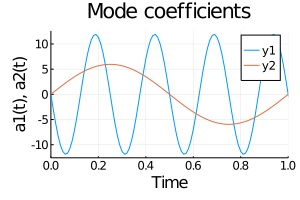

In [17]:
#plot of the Mode coefficents (σjVtj ; j={1,2]})
plot(t,Z.S[1]*Z.Vt[1,:],xlim=(0, 1))
plot!(t,Z.S[2]*Z.Vt[2,:],xlim=(0, 1))
xlabel!("Time");ylabel!("a1(t), a2(t)");title!("Mode coefficients") # Temporal modes

## Reduction and Reconstruction with feature extraction (two building blocks with their own dynamics are shown to exist

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\anim_2_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\6RLiv\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\anim_2_fps15.gif")
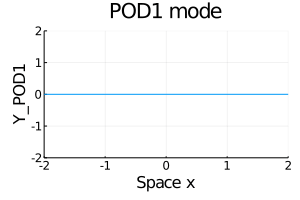

In [18]:
#Animation of the POD1 mode over the first second
Y_POD1=Z.U[:,1]*Z.S[1]*Z.Vt[1,:]'
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Y_POD1[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD1 mode",xlabel="Space x",ylabel="Y_POD1")
    Plots.frame(anim)
    j+=1
end
gif(anim, "img/anim_2_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\anim_3_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\6RLiv\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\anim_3_fps15.gif")
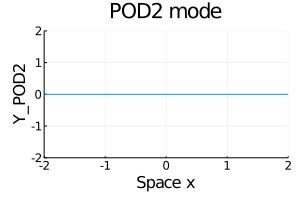

In [19]:
#Animation of the POD2 mode over the first second
Y_POD2=Z.U[:,2]*Z.S[2]*Z.Vt[2,:]'
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Y_POD2[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD2 mode",xlabel="Space x",ylabel="Y_POD2")
    Plots.frame(anim)
    j+=1
end
gif(anim, "img/anim_3_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\anim_4_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\6RLiv\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\anim_4_fps15.gif")
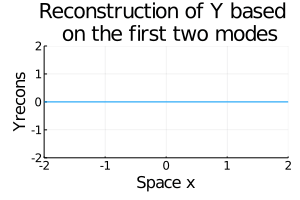

In [20]:
#Animation of Yrecons = Y_POD1+YPOD2 over the firt second
Yrecons=Y_POD1+Y_POD2
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Yrecons[:,j],xlim=(-2,2),leg=false,ylim=(-2.,2.),title="Reconstruction of Y based \n on the first two modes",xlabel="Space x",ylabel="Yrecons")
    Plots.frame(anim)
    j+=1
end
gif(anim, "img/anim_4_fps15.gif", fps = 15)

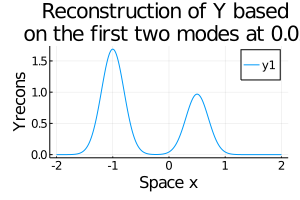

In [21]:
plot(x,Yrecons[:,30],title="Reconstruction of Y based \n on the first two modes at 0.029",xlabel="Space x",ylabel="Yrecons")

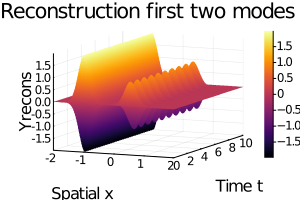

In [22]:
plot(x,t,Yrecons',st=:surface,xaxis="Spatial x", yaxis="Time t",zaxis="Yrecons")
title!("Reconstruction first two modes")

## Same test function but with different parameters inn order to mix alltopgether the different scales

In [23]:
A1 = 1.
x1 = 0.25
σ1 = 0.4

A2 = 1.5
x2 = -0.25
σ2 = 0.2

f1 = 1.
f2 = 4.
#gaussian processes
y1 = A1*exp.(-((x.-x1).^2)/(2*σ1^2))
y2 = A2*exp.(-((x.-x2).^2)/(2*σ2^2));

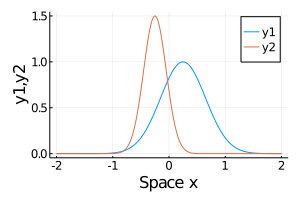

In [24]:
plot(x,y1)
plot!(x,y2,xlabel="Space x",ylabel="y1,y2")

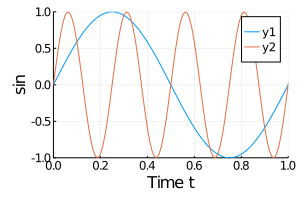

In [25]:
plot(t,sin.(2*π*f1*t))
plot!(t,sin.(2*π*f2*t),xlabel="Time t",ylabel="sin",xlim=(0,1),ylim=(-1,1))

In [26]:
Y = zeros(Nx,Nt)
j=1
for tt in t
    Y[:,j] = y1*sin(2*π*f1*tt) + y2*sin(2*π*f2*tt) # gaussian processes 
    j+=1                                           # with their temporal dynamics
end

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\anim_5_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\6RLiv\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\anim_5_fps15.gif")
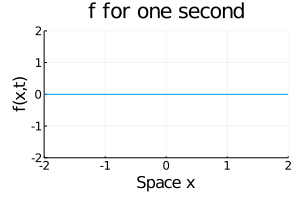

In [27]:
#Animation over the first second
anim=Animation()
anim = @animate for tt in range(0,1,length=100)
    plot( x, f(x,tt),xlim=(-2,2),title="f for one second",leg=false,ylim=(-2.,2.),xlabel="Space x",ylabel="f(x,t)")
    Plots.frame(anim)
end
gif(anim, "img/anim_5_fps15.gif", fps = 15)

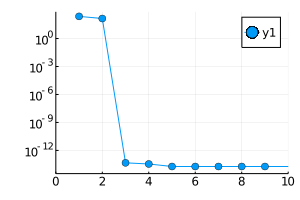

In [30]:
# Data decomposition with the singular value decomposition 
# U matrix (spatail Correlations); σ matrix (weighting of projections), Vt (time dynamics) 
Z=svd(Y)
#= plot of the singular values (see the  two most dominants features due to the two ranks dataset 
(the two bumps with their temporal dynamics). Again The very good decay shows the existence of a low rank subspace=#
plot(Z.S, yaxis=:log, xlim=(0,10),shape =:circle)

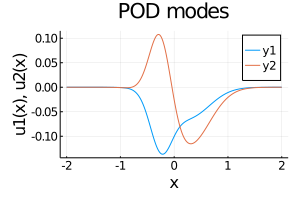

In [31]:
#= Plot of the POD modes (Uj ; j={1,2})The POD modes are not so physical, 
a kind of blending of the bumps occurs due to the greedy nature of the SVD algorithm =#
plot(x,Z.U[:,1])
plot!(x,Z.U[:,2])
xlabel!("x")
ylabel!("u1(x), u2(x)")
title!("POD modes")

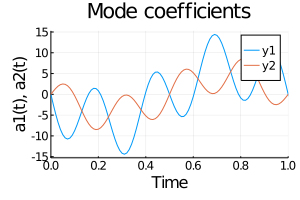

In [32]:
#plot of the Mode coefficents (σjVtj ; j={1,2]})
plot(t,Z.S[1]*Z.Vt[1,:],xlim=(0, 1))
plot!(t,Z.S[2]*Z.Vt[2,:],xlim=(0, 1))
xlabel!("Time");ylabel!("a1(t), a2(t)");title!("Mode coefficients")

## Features Extraction (less good results no?)

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\anim_6_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\6RLiv\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\anim_6_fps15.gif")
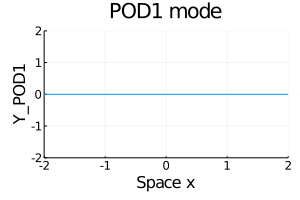

In [33]:
#Animation of the POD1 mode over the first second
Y_POD1=Z.U[:,1]*Z.S[1]*Z.Vt[1,:]'
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Y_POD1[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD1 mode",xlabel="Space x",ylabel="Y_POD1")
    Plots.frame(anim)
    j+=1
end
gif(anim, "img/anim_6_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\anim_7_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\6RLiv\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\anim_7_fps15.gif")
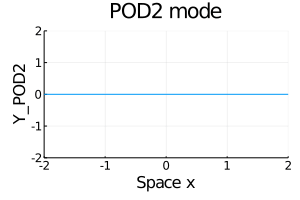

In [34]:
#Animation of the POD2 mode over the first second
Y_POD2=Z.U[:,2]*Z.S[2]*Z.Vt[2,:]'
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Y_POD2[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD2 mode",xlabel="Space x",ylabel="Y_POD2")
    Plots.frame(anim)
    j+=1
end
gif(anim, "img/anim_7_fps15.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = D:\Users\Administrator\OneDrive\Documents\Julia\ROM4SM\img\anim_8_fps15.gif
└ @ Plots D:\Users\Administrator\.julia\packages\Plots\6RLiv\src\animation.jl:104


Plots.AnimatedGif("D:\\Users\\Administrator\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\anim_8_fps15.gif")
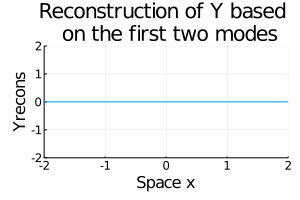

In [35]:
#Animation of Yrecons = Y_POD1+YPOD2 over the firt second
Yrecons=Y_POD1+Y_POD2
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Yrecons[:,j],xlim=(-2,2),leg=false,ylim=(-2.,2.),title="Reconstruction of Y based \n on the first two modes",xlabel="Space x",ylabel="Yrecons")
    Plots.frame(anim)
    j+=1
end
gif(anim, "img/anim_8_fps15.gif", fps = 15)

## What about  the dynamic mode decomposition (DMD) or robust DMD (RMD) data-driven methods or even POD-Galerkin method coupled with the discrete empirical interpolation method (DEIM) for non linear reduction  

In [37]:
using DataDrivenDiffEq, RobustDMD
D=DMD(Y)
#convert(Float64,D)
#show(stdout,"text/plain", round.({Float64}D;digits=2))

┌ Info: Precompiling RobustDMD [c3605908-9f0f-11e8-0a72-0d361c15a277]
└ @ Base loading.jl:1278


LinearKoopman([3.3129803462277647e-16 3.8120255601112645e-16 … 1.9139236694556662e-13 1.716166307424563e-13; 3.812025560115879e-16 4.3862436091735754e-16 … 2.2022243374860596e-13 1.9746781283387543e-13; … ; 1.9139236694489416e-13 2.202224337475656e-13 … 1.1056823251790992e-10 9.914370063289369e-11; 1.7161663074185327e-13 1.974678128329425e-13 … 9.914370063289365e-11 8.889961566124029e-11], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [9.052391648162252e-12 1.0415983416152575e-11 … 5.2296074313462534e-9 4.689254967668627e-9; 1.0415983416152577e-11 1.1984977533267785e-11 … 6.017360537968906e-9 5.395612991099795e-9; … ; 5.2296074313462534e-9 6.017360537968907e-9 … 3.0211677696848344e-6 2.7090037174182188e-6; 4.6892549676686276e-9 5.395612991099794e-9 … 2.7090037174182183e-6 2.429094211392076e-6], [9.070289793158428e-12 1.0436577618072454e-11 … 5.239947270332155e-9 4.69852643631442e-9; 1.0436577618072454e-11 1.2008673908104806e-11 … 6.029257901183933e-9